In [1]:
## Make sure plots are create inline
%matplotlib inline
## The usual packages (numpy, matplotlib, etc)
from RSE_style import *
from scipy.interpolate import interp1d
from scipy.ndimage.filters import gaussian_filter1d

In [2]:
import h5py as h5

In [3]:
# Read in solar irradiance:
file_irrad = '/Volumes/data1/ftp/XYZT_ESE156/TROPOMI/S5P_OFFL_L1B_IR_UVN_20181011T223825_20181012T001955_05158_01_010000_20181012T020852 2.h5'
fI = h5.File(file_irrad)

In [4]:
wl_solar = fI['BAND6_IRRADIANCE/STANDARD_MODE/INSTRUMENT/nominal_wavelength'][0,:,:]
spec_solar = fI['BAND6_IRRADIANCE/STANDARD_MODE/OBSERVATIONS/irradiance'][0,0,:,:]

In [5]:
fI.close()

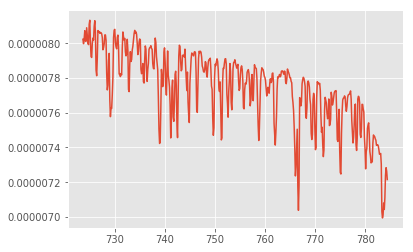

In [6]:
# Plot solar spectrum for specific footprint (imaging spectrometer!) 
fp = 100
plt.plot(wl_solar[fp,:], spec_solar[fp,:])

In [12]:
from scipy.interpolate import UnivariateSpline
spl = UnivariateSpline(wl_solar[fp,:], spec_solar[fp,:], k=3, s=0)

In [7]:
# Read in real data:
file_nadir = '/Volumes/data1/ftp/XYZT_ESE156/TROPOMI/S5P_OFFL_L1B_RA_BD6_20181012T034254_20181012T052423_05161_01_010000_20181012T070926.zip'
fn = h5.File(file_nadir)

In [8]:
lat = fn['BAND6_RADIANCE/STANDARD_MODE/GEODATA/latitude'][0,:,:]
lon = fn['BAND6_RADIANCE/STANDARD_MODE/GEODATA/longitude'][0,:,:]
sza = fn['BAND6_RADIANCE/STANDARD_MODE/GEODATA/solar_zenith_angle'][0,:,:]

In [10]:
wl_spec = fn['BAND6_RADIANCE/STANDARD_MODE/INSTRUMENT/nominal_wavelength'][0,:,:]
spec = fn['BAND6_RADIANCE/STANDARD_MODE/OBSERVATIONS/radiance'][0,:,:,:]
print(wl_spec.shape, spec.shape)

(448, 497) (3246, 448, 497)


### This is just for testing, we could actually try to use the meausred solar spectrum for the SIF fit (haven't really done that yet!) or use the SVD approach by Philipp. I wouldn't mind if we tested the Solar Spectrum Approach for now here, could be fun!!  
Important: We can use the measured solar spectrum as a baseline but some things will be missing, e.g. weak water absorptions below 750nm (can probably be ignored) and we need to match the wavelength grid. Using the homework dataset, it would be great to test how this works though. The univariate spline can also directly provide derivatives. 

(0.06, 0.063)

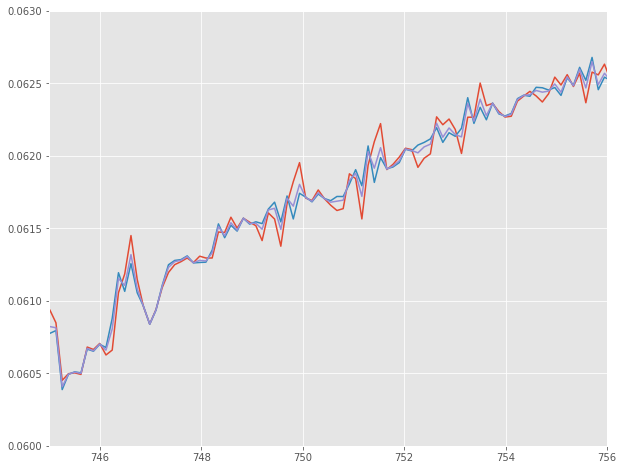

In [36]:
figsize(10,8)
so = 1500
fac = 1.000025
plt.plot(wl_spec[fp,:], spec[so,fp,:]/spl(wl_solar[fp,:]))
plt.plot(wl_spec[fp,:], spec[so,fp,:]/spl(wl_spec[fp,:]))
plt.plot(wl_spec[fp,:], spec[so,fp,:]/spl(fac*wl_solar[fp,:]))
plt.xlim((745,756))
plt.ylim((0.06,0.063))

## If we can trust the WL calibration, we can already see here that a multiplier (more like a Doppler shift) actually works better than a regular shift. Why don't we just try a wl grid multiplier in this example?

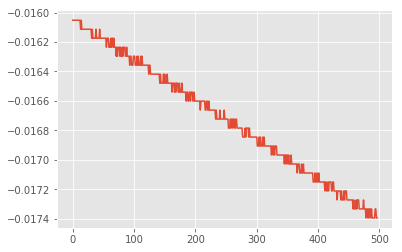

In [23]:
# You see the shift is not constant!
plt.plot(wl_solar[fp,:]-wl_spec[fp,:])

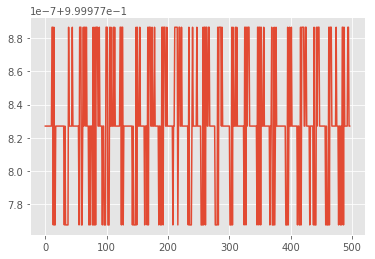

In [24]:
# You see the wl multiplier is constant (only numerical errors here)
plt.plot(wl_solar[fp,:]/wl_spec[fp,:])

In [29]:
np.mean(wl_spec[fp,:]/wl_solar[fp,:])

1.0000221